# Computing the minimum initial distance between uniformly distributed particles
Tim Tyree<br>
6.8.2021<br>

__Weibull Distribution is followed__<br>
The distribution of minimum distance between initial conditions is not significantly different from the maximum likelihood fit to the Weibull distribution according to a Cramér-von Mises test for the N=5 case (p=0.634) and the N=20 case (p=0.187), but not the N=10 case  (p=0.024).  The number of samples considered in these tests were Nsamples=1000.<br>

Computation was done in Mathematica.

In [1]:
from lib.my_initialization import *

In [2]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#random number stream A
rs = RandomState(MT19937(SeedSequence(123456789)))
#random number stream B
# rs = RandomState(MT19937(SeedSequence(987654321)))

#get distance metric
distance_L2_pbc=get_distance_L2_pbc(width=1,height=1)

In [3]:
def get_random_distances_pbc(N):
    x_values=rs.uniform(size=N)
    y_values=rs.uniform(size=N)
    i_neigh_lst=np.zeros_like(x_values).astype('int')
    nearest_dist_lst=np.zeros_like(x_values)+9e9
    for i in range(N-1):
        point1=(x_values[i],y_values[i])
        for j in range(i+1,N):
            point2=(x_values[j],y_values[j])
            #compute distance
            dist=distance_L2_pbc(np.array(point1),np.array(point2))
            if nearest_dist_lst[i]>dist:
                nearest_dist_lst[i]=dist
            if nearest_dist_lst[j]>dist:
                nearest_dist_lst[j]=dist
    return nearest_dist_lst

def get_minimum_distance(N):
    return np.min(get_random_distances_pbc(N))


In [4]:
def sample_minimum_distance(N,L,nobs):
    min_dist_lst=[]
    for n in range(nobs):
        min_dist_lst.append(L*get_minimum_distance(N))
    return min_dist_lst

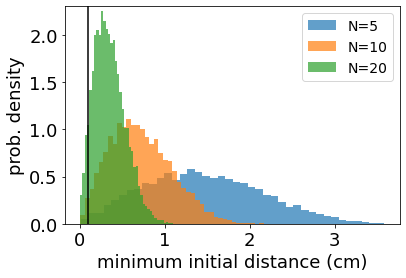

In [5]:
nobs=10000
L=10#cm
fontsize=18

N=5
min_dist_lst_1=sample_minimum_distance(N,L,nobs)
plt.hist(min_dist_lst_1,bins=40,label=f'N={N}',alpha=0.7,density=True)
N=10
min_dist_lst_2=sample_minimum_distance(N,L,nobs)
plt.hist(min_dist_lst_2,bins=40,label=f'N={N}',alpha=0.7,density=True)
N=20
min_dist_lst_3=sample_minimum_distance(N,L,nobs)
plt.hist(min_dist_lst_3,bins=40,label=f'N={N}',alpha=0.7,density=True)

#plot line at r=0.1cm
plt.plot([0.1,0.1],[0,2.5],'k')

plt.xlabel(r'minimum initial distance (cm)',fontsize=fontsize)
plt.ylabel(r'prob. density', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-4)
plt.ylim([0,2.3])
plt.show()

# Show how the mean / variance varies with the density

In [6]:
def get_summary_minimum_distance(N,L,nobs):
    values=sample_minimum_distance(N,L,nobs)
    return np.mean(values),np.var(values)

In [7]:
rs = RandomState(MT19937(SeedSequence(123456789)))

In [8]:
N_values=np.arange(5,100)
# nobs=1000#0
A=L**2
q_values=N_values/A

In [ ]:
m_lst=[]
v_lst=[]
for N in N_values:
    m,v=get_summary_minimum_distance(N,L,nobs)
    m_lst.append(m)
    v_lst.append(v)

In [ ]:
beep(4)

In [ ]:
fontsize=18
plt.plot(q_values,m_lst)
#plot line at r=0.1cm
plt.plot([0.,1.],[0.1,0.1],'k')
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel('mean mininum\ninitial distance (cm)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.ylim([0,2.3])
plt.show()

In [ ]:
fontsize=18
plt.plot(q_values,m_lst)
#plot line at r=0.1cm
plt.plot([0.05,1.],[0.1,0.1],'k')
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel('mean mininum\ninitial distance (cm)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.xscale('log')
plt.yscale('log')
# plt.ylim([0,2.3])
plt.show()

In [ ]:
def print_fit_power_law(x,y):
    B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
    rmse=compute_power_rmse(x,y,m,B)
    M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)

    print(f"m={m:.6f}+-{Delta_m:.6f}; B={B:.6f}+-{Delta_B:.6f}")
    print(f"M= {M:.6f}+-{Delta_M:.6f} cm^{{1-2m}}")
    print(f"RMSE={rmse:.4f} cm")
    print(f"R^2={Rsq:.4f}")
    
    
print_fit_power_law(x=q_values,y=m_lst)
print_fit_power_law

In [ ]:
fontsize=18
plt.plot(q_values,np.sqrt(np.array(v_lst)))
#plot line at r=0.1cm
plt.plot([0.,1.],[0.1,0.1],'k')
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel('stdev mininum\ninitial distance (cm)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.ylim([0,2.3])
plt.show()

In [ ]:
r=0.1
print(r/L)
#find the first q that crosses r=0.1
m_values=np.array(m_lst)

In [ ]:
q_values[m_values<r][0]

__Result__<br>
When r/L=0.01, the smallest density that starts within range is (on average) located in the interval 0.71<q<0.72.

In [ ]:
#TODO: save output as csv
#TODO: power law fit.  is the exponent -1/2 like PM predicted?